**Amaç:** MSE değerini min yapacak şekilde katsayılar ya da karar kuralları bulmak.

- Gerçek değerlerle modelin yaptığı tahminler arasındaki fark yani artıklar dikkate alınarak, bu hataları düzeltmeye yönelik yeni modeller kurulur.
- Bu işlem, her yeni modelin bir öncekinin hatalarını öğrenmesi prensibiyle ilerler.
- Bu şekilde oluşturulan modellerin birleşimiyle nihai tahmin yapılır.
- GBM (Gradient Boosting Machine) yöntemi de bu mantıkla çalışan, aşamalı olarak öğrenen ve hataları minimize etmeye çalışan bir topluluk (ensemble) modelidir.
- Gradient descent algoritmasını kullanır.(Boosting + gradient descent)

#### **------>** Boosting yöntemleri, zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("../Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League", "Division" , "NewLeague" ,"Salary"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=33)

In [3]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [4]:
y_pred = gbm_model.predict(X_test)

In [5]:
np.sqrt(mean_squared_error(y_test, y_pred))

244.18766762712534

In [13]:
gbm_params = {"learning_rate": [0.001, 0.1, 0.01],
              "max_depth": [3,5,8],
              "n_estimators": [100, 200, 500],
              "subsample": [1, 0.5, 0.8],
              "loss": ['squared_error', 'absolute_error', 'huber', 'quantile']}

In [14]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv= 10, n_jobs = -1).fit(X_train, y_train)

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [15]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 8,
 'n_estimators': 200,
 'subsample': 0.5}

In [16]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01, loss = "squared_error", max_depth = 8, n_estimators = 200, subsample = 0.5).fit(X_train, y_train)

In [17]:
y_pred = gbm_tuned.predict(X_test)

In [18]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

241.84886908437804

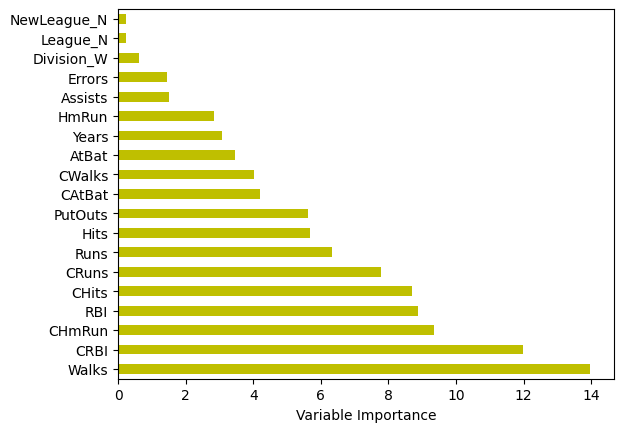

In [19]:
#degisken onem duzeyleri kontrolu
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending=False).plot(kind = "barh", color = "y")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None
